C:\Users\91737\Anaconda3\lib\site-packages\pandas\core\series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


Text(-150, 120, '$ \\sigma $ = 5.59 $(\\mathrm{km\\ s}^{-1})$')

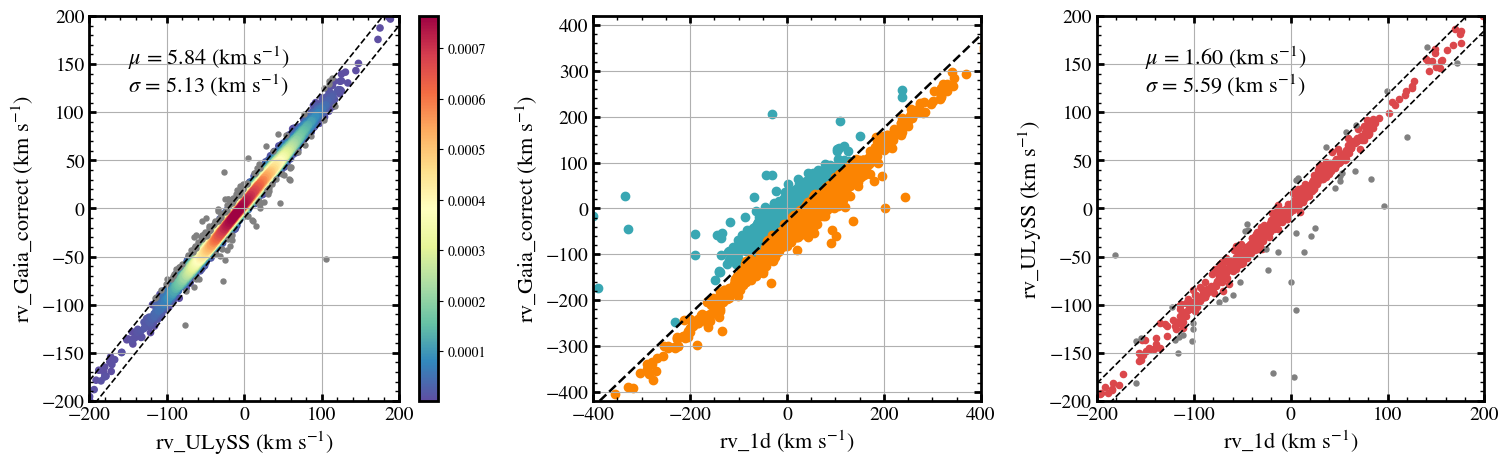

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Wed Nov 22 10:16:05 2023

@author: Hailing Lu
"""


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.stats import gaussian_kde
plt.style.use('default')
# 设置新罗马字体
#rcParams['font.family'] = 'serif'
#rcParams['font.serif'] = ['Times New Roman']
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['axes.linewidth'] = 2.0

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
fig.subplots_adjust(wspace=0.3)
#fig, axs = plt.subplots(3, 1, figsize=(7, 18))

#---------------------------------------------图 1------------------------------------------------------

# 读取CSV文件
file_path_inner = 'D:/PhD/画图/散点图 & 散点密度图/havegaia_uly_5516_in3sigma_5376.csv'
file_path_outer = 'D:/PhD/画图/散点图 & 散点密度图/file1_unmatched.csv'

data_inner = pd.read_csv(file_path_inner)
data_outer = pd.read_csv(file_path_outer)


# 绘制散点密度图
#plt.figure()
# Calculate the point density

# 提取inner两列数据
x = data_inner['rv_uly']
y = data_inner['rv_gaia_correct']

xy = np.vstack([x,y])  #  将两个维度的数据叠加
z = gaussian_kde(xy)(xy)  # 建立概率密度分布，并计算每个样本点的概率密度

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

axs[0].tick_params(direction='in', which='both', top=True, right=True)
axs[0].minorticks_on()
axs[0].tick_params(which='minor', length=3, width=1)
axs[0].tick_params(which='major', length=5, width=2)
axs[0].grid(True)

im1 = axs[0].scatter(x, y,c=z, s=20,cmap='Spectral_r') # c表示标记的颜色
fig.colorbar(im1, ax=axs[0])
#-----------------------------------------------------
#fit = np.polyfit(x, y, 1)
#fit_fn = np.poly1d(fit)
#
## 得出拟合直线的方程式
#print("拟合直线的方程式为：\n", fit_fn)
mu = 5.84
sigma = 5.13
numbers = np.array(range(-200, 201, 1))
#ynumbers = fit_fn(numbers)
ynumbers = numbers + mu
# 在散点图上用虚线画出这条拟合直线
axs[0].plot(numbers, ynumbers+3*sigma,  linestyle='--', color='k', linewidth=1.2)
axs[0].plot(numbers, ynumbers-3*sigma,  linestyle='--', color='k', linewidth=1.2)
#-----------------------------------------------------
# 提取outer两列数据, 绘制outer散点图
x = data_outer['rv_uly']
y = data_outer['rv_gaia_correct']
#ax.scatter(x, y, alpha=0.5, c='gray', s=10)
axs[0].scatter(x, y, c='gray', s=13)

axs[0].set_xlim(-200, 200)
axs[0].set_ylim(-200, 200)
axs[0].set_xlabel(r'$\mathrm{rv\_ULySS}\ (\mathrm{km\ s}^{-1})$', fontdict={'size': 16})
axs[0].set_ylabel(r'$\mathrm{rv\_Gaia\_correct}\ (\mathrm{km\ s}^{-1})$', fontdict={ 'size': 16})
#axs[0].set_yticks(fontproperties = 'Times New Roman', size = 14)
#axs[0].set_xticks(fontproperties = 'Times New Roman', size = 14)
axs[0].tick_params(axis='y', labelsize=14)
axs[0].tick_params(axis='x', labelsize=14)
axs[0].text(-150, 150, '$ \mu $ = 5.84 $(\mathrm{km\ s}^{-1})$', size = 16)
axs[0].text(-150, 120, '$ \sigma $ = 5.13 $(\mathrm{km\ s}^{-1})$', size = 16)

#---------------------------------------------图 2------------------------------------------------------

# 读取CSV文件
file_path = 'D:/PhD/画图/散点图 & 散点密度图/gaia_ulyss_out3sigma_have_gaia_1d_rv_2313.csv'
data = pd.read_csv(file_path)

# 提取两列数据
x = data['rv_1d']
y = data['rv_gaia_correct']

# Split the points into two groups
group1 = data[x < 0.986*(y+484)-450]
group2 = data[x >= 0.986*(y+484)-450]

x1 = group1['rv_1d']
y1 = group1['rv_gaia_correct']
x2 = group2['rv_1d']
y2 = group2['rv_gaia_correct']

axs[1].tick_params(direction='in', which='both', top=True, right=True)
axs[1].minorticks_on()
axs[1].tick_params(which='minor', length=3, width=1)
axs[1].tick_params(which='major', length=5, width=2)
axs[1].grid(True)
# Plot the data as a scatter plot
#plt.scatter(x1, y1, alpha=0.5, c=[(33/255, 158/255, 188/255)])
#plt.scatter(x2, y2, alpha=0.5, c=[(251/255, 132/255, 2/255)])
#plt.scatter(x1, y1, alpha=0.5, c=[(48/255, 104/255, 141/255)])
#plt.scatter(x2, y2, alpha=0.5, c=[(230/255, 111/255, 81/255)])
axs[1].scatter(x1, y1, c=[(57/255, 167/255, 179/255)])
axs[1].scatter(x2, y2, c=[(251/255, 132/255, 2/255)])
axs[1].set_xlim(-400,400)
axs[1].set_ylim(-420,420)
axs[1].set_xlabel(r'$\mathrm{rv\_1d}\ (\mathrm{km\ s}^{-1})$', fontdict={'size': 16})
axs[1].set_ylabel(r'$\mathrm{rv\_Gaia\_correct}\ (\mathrm{km\ s}^{-1})$', fontdict={ 'size': 16})
#axs[1].yticks(fontproperties = 'Times New Roman', size = 14)
#axs[1].xticks(fontproperties = 'Times New Roman', size = 14)
#axs[1].set_yticks(size = 14)
#axs[1].set_xticks(size = 14)
axs[1].tick_params(axis='y', labelsize=14)
axs[1].tick_params(axis='x', labelsize=14)

numbers = np.array(range(-500, 500, 1))
ynumbers = 0.986*(numbers+484)-450
axs[1].plot(ynumbers, numbers, linestyle='--', color='k', linewidth=1.8)

#---------------------------------------------图 3------------------------------------------------------

# 读取CSV文件
file_path = 'D:/PhD/画图/散点图 & 散点密度图/after_two_steps_have_1d_uly_732.csv'
data = pd.read_csv(file_path)

# 提取两列数据
x = data['rv_1d']
y = data['rv_uly']

mu = 1.6
sigma = 5.59

# Split the points into two groups
inner_mask=(y < x+mu+3*sigma) & (y > x+mu-3*sigma)
data_inner = data[inner_mask]
data_outer = data[~inner_mask]

# 绘制散点密度图
#plt.figure()
# Calculate the point density

# 提取inner两列数据
x = data_inner['rv_1d']
y = data_inner['rv_uly']

xy = np.vstack([x,y])  #  将两个维度的数据叠加
z = gaussian_kde(xy)(xy)  # 建立概率密度分布，并计算每个样本点的概率密度

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

axs[2].tick_params(direction='in', which='both', top=True, right=True)
axs[2].minorticks_on()
axs[2].tick_params(which='minor', length=3, width=1)
axs[2].tick_params(which='major', length=5, width=2)
axs[2].grid(True)

#im2=axs[2].scatter(x, y,c=z, s=20,cmap='Spectral_r') # c表示标记的颜色
#fig.colorbar(im2, ax=axs[2])
axs[2].scatter(x, y, s=20,c=[(219/255, 71/255, 75/255)]) # c表示标记的颜色

mu = 1.6
sigma = 5.59
numbers = np.array(range(-200, 201, 1))
#ynumbers = fit_fn(numbers)
ynumbers = numbers + mu
# 在散点图上用虚线画出这条拟合直线
axs[2].plot(numbers, ynumbers+3*sigma,  linestyle='--', color='k', linewidth=1.2)
axs[2].plot(numbers, ynumbers-3*sigma,  linestyle='--', color='k', linewidth=1.2)
#-----------------------------------------------------
# 提取outer两列数据, 绘制outer散点图
x = data_outer['rv_1d']
y = data_outer['rv_uly']
#ax.scatter(x, y, alpha=0.5, c='gray', s=10)
axs[2].scatter(x, y, c='gray', s=13)

axs[2].set_xlim(-200, 200)
axs[2].set_ylim(-200, 200)
axs[2].set_xlabel(r'$\mathrm{rv\_1d}\ (\mathrm{km\ s}^{-1})$', fontdict={'size': 16})
axs[2].set_ylabel(r'$\mathrm{rv\_ULySS}\ (\mathrm{km\ s}^{-1})$', fontdict={ 'size': 16})
#给出python代码示例，使用set_ylabel()函数设置y轴的label到y轴的距离
#axs[2].yticks(fontproperties = 'Times New Roman', size = 14)
#axs[2].xticks(fontproperties = 'Times New Roman', size = 14)
axs[2].tick_params(axis='y', labelsize=14)
axs[2].tick_params(axis='x', labelsize=14)
axs[2].text(-150, 150, '$ \mu $ = 1.60 $(\mathrm{km\ s}^{-1})$', size = 16)
axs[2].text(-150, 120, '$ \sigma $ = 5.59 $(\mathrm{km\ s}^{-1})$', size = 16)
#fig.savefig('Horizontal_tight.pdf', format='pdf', bbox_inches='tight', pad_inches=0)
#fig.savefig('Vertical_tight.pdf', format='pdf', bbox_inches='tight', pad_inches=0)
#fig.savefig('Horizontal2.png', format='png')
#fig.savefig('Vertical2.png', format='png')
#或存为.eps文件